In [1]:
import pandas as pd 
import numpy as np 
import requests
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [53]:
stream_health = pd.read_csv(r"C:\Users\blang\Desktop\data\Benthic_Stream_Health.csv", parse_dates = ['sample_date'], index_col = 'sample_date', low_memory=False)

In [54]:
values = {'excellent': 5, 'good':3, 'fair':2, 'poor':1, 'very_poor':0}
for feature in ['rating']:
    stream_health[feature] = stream_health[feature].map(values) 

In [55]:
stream_health.head(2)

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
sample_date,,,,,,,,,,,,,,,,,
2006-07-26,0,74228_1,74228,1,napu,BNTY005.7-4176,50.326099,3,41.94361,-76.71500,CBP,SRBC,20501050602,Middle Bentley Creek,42015,PA,Bradford County
2006-07-26,1,74231_1,74231,1,napu,BNTY002.5-4176,56.969635,3,41.98583,-76.72278,CBP,SRBC,20501050603,Lower Bentley Creek,42015,PA,Bradford County


In [56]:
stream_health.sort_values(by='sample_date', inplace=True)

In [57]:
stream_health

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
sample_date,,,,,,,,,,,,,,,,,
1994-04-30,4494,1767_1,1767,1,lnp,"ANS.SITE 6, ROCK CREEK AT MUNCASTER MILL ROAD",55.593878,1,39.13803,-77.12872,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
1994-04-30,1594,121_1,121,1,blue,ANS.NW-NW 13,9.100817,0,39.06963,-77.97016,CMC,ANS,20700070201,Chapel Run-Shenandoah River,51043,VA,Clarke County
1994-04-30,5357,447_1,447,1,lnp,"ANS.SITE 14, DAYSPRING CREEK",69.519411,1,39.20321,-77.22988,CMC,ANS,20700080802,Great Seneca Creek,24031,MD,Montgomery County
1994-05-01,5416,542_1,542,1,lnp,"ANS.SITE 15, COUNTRYSIDE TRIBUTARY OF PAINT BR...",5.694700,0,39.08736,-76.96345,CMC,ANS,20700100202,Paint Branch,24031,MD,Montgomery County
1994-05-08,4743,2034_1,2034,1,lnp,ANS.UR-RC 4,83.519834,3,39.15474,-77.13165,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-20,4821,2172_1,2172,1,lnp,RAS.09-PL21-SUG-SLR4,29.271670,0,38.97879,-77.36440,CMC,RAS,20700080905,Sugarland Run,51059,VA,Fairfax County
2019-11-20,6808,2250_1,2250,1,pied,RAS.09-PL22-SNA-DR30,33.384617,1,38.92889,-77.33970,CMC,RAS,20700081004,Difficult Run,51059,VA,Fairfax County
2019-11-20,6940,2974_1,2974,1,pied,VSOS.PIPE DAM RUN-1,39.336360,1,38.33279,-77.61132,CMC,VASOS,20801040101,Motts Run Reservoir-Rappahannock River,51177,VA,Spotsylvania County


In [71]:
df_2015 = stream_health.iloc[6320:6508,:]

In [77]:
df_2015.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False)

,Unnamed: 0,event_id,sample_num,chessie_bibi,rating,Latitude,Longitude,HUC12,FIPS
COUNTY,,,,,,,,,
Montgomery County,4569.017857,1248.214286,1.0,50.401513,1.232143,39.148113,-77.179333,2.069473e+10,24031.0
Bedford County,1613.000000,2497.000000,1.0,49.429618,1.000000,37.565070,-79.422090,2.080203e+10,51019.0
Madison County,5156.000000,2903.000000,1.0,52.990539,1.000000,38.532220,-78.236670,2.080103e+10,51113.0
Rappahannock County,5264.500000,3000.500000,1.0,47.518757,1.000000,38.761670,-78.034170,2.080103e+10,51157.0
Rockbridge County,3578.000000,2528.000000,1.0,48.732746,1.000000,37.874000,-79.379000,2.080202e+10,51163.0
Fauquier County,5332.818182,2725.636364,1.0,40.718099,0.818182,38.775595,-77.882770,2.075515e+10,51061.0
Augusta County,3366.857143,2476.857143,1.0,39.690134,0.714286,38.170741,-79.138671,2.070005e+10,51015.0
Prince William County,5579.615385,2606.000000,1.0,34.479171,0.538462,38.756692,-77.506517,2.070010e+10,51153.0
Loudoun County,4652.210526,2611.789474,1.0,35.083153,0.473684,39.083804,-77.742081,2.070008e+10,51107.0


In [86]:
df_2016 = stream_health.iloc[6509:6725,:]

In [117]:
df_2016.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False) - df_2015.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False)

,Unnamed: 0,event_id,sample_num,chessie_bibi,rating,Latitude,Longitude,HUC12,FIPS
COUNTY,,,,,,,,,
Albemarle County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Augusta County,-262.190476,3.809524,0.0,-0.930032,0.202381,-0.009985,-0.060502,1.699498e+07,0.0
Bath County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bedford County,3146.200000,9.400000,0.0,4.611433,0.200000,-0.035640,-0.011682,5.999985e-01,0.0
Culpeper County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
District of Columbia,-157.571429,31.857143,0.0,5.470365,0.142857,-0.001233,-0.000060,0.000000e+00,0.0
Fairfax County,47.576552,-38.463448,0.0,-1.718998,-0.022069,0.011486,0.008536,-1.906693e+03,0.0
Fauquier County,-121.356643,-17.097902,0.0,4.793845,0.027972,0.034055,-0.012188,-8.472518e+06,0.0
Frederick County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_2017 = stream_health.iloc[6726:6955,:]

In [106]:
df_2017.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False)

,Unnamed: 0,event_id,sample_num,chessie_bibi,rating,Latitude,Longitude,HUC12,FIPS
COUNTY,,,,,,,,,
Richmond city,2973.333333,2867.333333,1.0,46.685788,1.666667,37.514497,-77.474140,2.080206e+10,51760.0
Montgomery County,4570.836066,1270.540984,1.0,50.925202,1.213115,39.135722,-77.168443,2.069517e+10,24031.0
Alleghany County,2199.000000,2859.000000,1.0,38.347726,1.000000,37.871310,-79.968450,2.080201e+10,51005.0
Lexington city,3604.333333,2877.333333,1.0,34.105672,1.000000,37.780893,-79.453440,2.080202e+10,51678.0
Shenandoah County,3597.000000,2727.000000,1.0,45.432451,1.000000,38.983330,-78.333330,2.070006e+10,51171.0
Warren County,3604.000000,2843.000000,1.0,34.938687,1.000000,38.916670,-78.187420,2.070005e+10,51187.0
Culpeper County,5276.500000,3014.500000,1.0,45.741347,1.000000,38.521940,-78.171670,2.080103e+10,51047.0
Bedford County,4237.000000,2507.000000,1.0,45.828409,1.000000,37.535370,-79.431825,2.080203e+10,51019.0
Prince William County,5939.562500,2721.500000,1.0,40.370056,0.875000,38.690719,-77.416742,2.070010e+10,51153.0


In [112]:
df_2018 = stream_health.iloc[6956:7151,:]

In [114]:
df_2019 = stream_health.iloc[7152::,:]

In [115]:
df_2018.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False)

,Unnamed: 0,event_id,sample_num,chessie_bibi,rating,Latitude,Longitude,HUC12,FIPS
COUNTY,,,,,,,,,
Alleghany County,2200.000000,2860.000000,1.0,44.482230,2.000000,37.871310,-79.968450,2.080201e+10,51005.0
Henrico County,987.000000,2125.000000,1.0,34.961409,1.666667,37.588610,-77.493610,2.080206e+10,51087.0
Richmond city,2479.500000,2830.000000,1.0,42.122374,1.500000,37.514542,-77.475190,2.080206e+10,51760.0
Montgomery County,4632.426230,1256.311475,1.0,50.413939,1.065574,39.140140,-77.165120,2.069517e+10,24031.0
Lexington city,3618.000000,3052.000000,1.0,40.916446,1.000000,37.780560,-79.453330,2.080202e+10,51678.0
Spotsylvania County,6938.000000,2972.000000,1.0,51.359908,1.000000,38.332790,-77.611320,2.080104e+10,51177.0
Shenandoah County,2890.000000,2606.000000,1.0,38.652903,1.000000,38.979365,-78.445515,2.070006e+10,51171.0
Rockbridge County,3437.777778,2698.111111,1.0,43.695648,1.000000,37.816831,-79.483909,2.080202e+10,51163.0
Madison County,5161.000000,2908.000000,1.0,46.108135,1.000000,38.532220,-78.236670,2.080103e+10,51113.0


In [116]:
df_2019.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False)

,Unnamed: 0,event_id,sample_num,chessie_bibi,rating,Latitude,Longitude,HUC12,FIPS
COUNTY,,,,,,,,,
Henrico County,989.000000,2127.000000,1.0,47.755616,2.000000,37.588610,-77.493610,2.080206e+10,51087.0
Charles County,1003.000000,2975.000000,1.0,49.097280,2.000000,38.454000,-77.134600,2.070011e+10,24017.0
Richmond city,2481.000000,2831.750000,1.0,38.542812,1.500000,37.514543,-77.475190,2.080206e+10,51760.0
Montgomery County,4619.029851,1294.776119,1.0,48.323582,1.059701,39.129296,-77.163590,2.069561e+10,24031.0
Alleghany County,2201.500000,2861.500000,1.0,36.682378,1.000000,37.871310,-79.968450,2.080201e+10,51005.0
Rockbridge County,3271.615385,2697.923077,1.0,45.644989,1.000000,37.815431,-79.503912,2.080202e+10,51163.0
Rappahannock County,5207.600000,2869.000000,1.0,50.851236,1.000000,38.676352,-78.163100,2.080103e+10,51157.0
Madison County,5159.666667,2906.666667,1.0,49.333772,1.000000,38.458427,-78.305650,2.080103e+10,51113.0
Lexington city,3620.500000,3054.500000,1.0,32.224998,1.000000,37.780560,-79.453330,2.080202e+10,51678.0


In [6]:
stream_health.index.rename('Date', inplace=True)

In [7]:
stream_health.sort_values(by='Date', inplace=True)

In [39]:
stream_health.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False)

,Unnamed: 0,event_id,sample_num,chessie_bibi,rating,Latitude,Longitude,HUC12,FIPS
COUNTY,,,,,,,,,
Wayne County,774.333333,85445.166667,1.0,56.070332,3.166667,41.810670,-75.458798,2.050103e+10,42127.000000
Susquehanna County,197.063492,84435.984127,1.0,55.848433,3.079365,41.829072,-75.831926,2.050104e+10,42115.000000
Petersburg city,1089.500000,76358.000000,1.0,60.000000,3.000000,37.217880,-77.444380,2.080207e+10,51730.000000
Colonial Heights city,1397.000000,87432.000000,1.0,64.936243,3.000000,37.258790,-77.396360,2.080207e+10,51570.000000
King and Queen County,1488.000000,91505.666667,1.0,60.568796,3.000000,37.748110,-76.963173,2.080105e+10,51097.000000
Richmond County,1227.400000,82499.800000,1.0,60.000000,3.000000,37.928632,-76.652340,2.080104e+10,51159.000000
Berks County,2629.000000,76044.000000,1.0,73.391783,3.000000,40.489790,-76.291450,2.050305e+10,42011.000000
Surry County,1133.333333,80074.666667,1.0,62.323696,3.000000,37.174167,-76.958040,2.080206e+10,51181.000000
Middlesex County,1593.000000,95568.000000,1.0,63.710692,3.000000,37.633610,-76.695830,2.080102e+10,51119.000000


In [12]:
recent_df['COUNTY'].value_counts()

Montgomery County        307
Fairfax County           275
Loudoun County            84
Fauquier County           79
Prince William County     70
Rappahannock County       39
Augusta County            37
Rockbridge County         35
District of Columbia      34
Madison County            17
Bedford County            12
Richmond city             11
Lexington city             9
Spotsylvania County        5
Greene County              4
Warren County              4
Alleghany County           4
Henrico County             4
Culpeper County            4
Rockingham County          3
Frederick County           3
Shenandoah County          3
Albemarle County           2
Lynchburg city             2
York County                2
Chesterfield County        2
Bath County                1
Charles County             1
Name: COUNTY, dtype: int64

In [13]:
Montgomery = recent_df[recent_df['COUNTY'] == 'Montgomery County']
Rappahannock = recent_df[recent_df['COUNTY'] == 'Rappahannock County']
Fairfax = recent_df[recent_df['COUNTY'] == 'Fairfax County']
Frederick = recent_df[recent_df['COUNTY'] == 'Frederick County']
Loudoun = recent_df[recent_df['COUNTY'] == 'Loudoun County']
Howard = recent_df[recent_df['COUNTY'] == 'Howard County']
Augusta = recent_df[recent_df['COUNTY'] == 'Augusta']
DC = recent_df[recent_df['COUNTY'] == 'District of Columbia']
Rockbridge = recent_df[recent_df['COUNTY'] == 'Rockbridge']
Fauquier = recent_df[recent_df['COUNTY'] == 'Fauquier County']
Prince_William = recent_df[recent_df['COUNTY'] == 'Prince William County ']
Madison = recent_df[recent_df['COUNTY'] == 'Madison']
Bedford = recent_df[recent_df['COUNTY'] == 'Bedford']
Richmond = recent_df[recent_df['COUNTY'] == 'Richmond City']

In [14]:
Montgomery

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,,
2015-04-04,4604,1924_1,1924,1,lnp,"ANS.SITE 7, NORTH BRANCH OF ROCK CREEK AT KENG...",16.436466,0,39.11912,-77.10306,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
2015-04-09,5401,524_1,524,1,lnp,"ANS.SITE 14, DAYSPRING CREEK",21.611384,0,39.20321,-77.22988,CMC,ANS,20700080802,Great Seneca Creek,24031,MD,Montgomery County
2015-04-10,6036,868_1,868,1,lnp,"ANS.SITE 20, WILDCAT BRANCH",89.977679,3,39.21821,-77.21548,CMC,ANS,20700080802,Great Seneca Creek,24031,MD,Montgomery County
2015-04-11,4388,1604_1,1604,1,lnp,"ANS.SITE 39, FALLSREACH TRIBUTARY OF WATTS BRANCH",9.786603,0,39.05875,-77.19667,CMC,ANS,20700081002,Watts Branch,24031,MD,Montgomery County
2015-04-11,2496,1672_1,1672,1,unp,"ANS.SITE 44, HAWLINGS RIVER",68.311907,2,39.21194,-77.08472,CMC,ANS,20600060104,Hawlings River,24031,MD,Montgomery County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-26,4282,1455_1,1455,1,lnp,"ANS.SITE 34, SLIGO CREEK",27.552790,0,39.03398,-77.02975,CMC,ANS,20700100201,Northwest Branch Anacostia River,24031,MD,Montgomery County
2019-10-28,4431,1668_1,1668,1,lnp,"ANS.SITE 42, TRIBUTARY OF NORTHWEST BRANCH AT ...",40.584376,1,39.05929,-77.01001,CMC,ANS,20700100201,Northwest Branch Anacostia River,24031,MD,Montgomery County
2019-10-28,4324,1512_1,1512,1,lnp,"ANS.SITE 36, DARK BRANCH",87.686888,3,39.26703,-77.30713,CMC,ANS,20700090702,Little Bennett Creek,24031,MD,Montgomery County


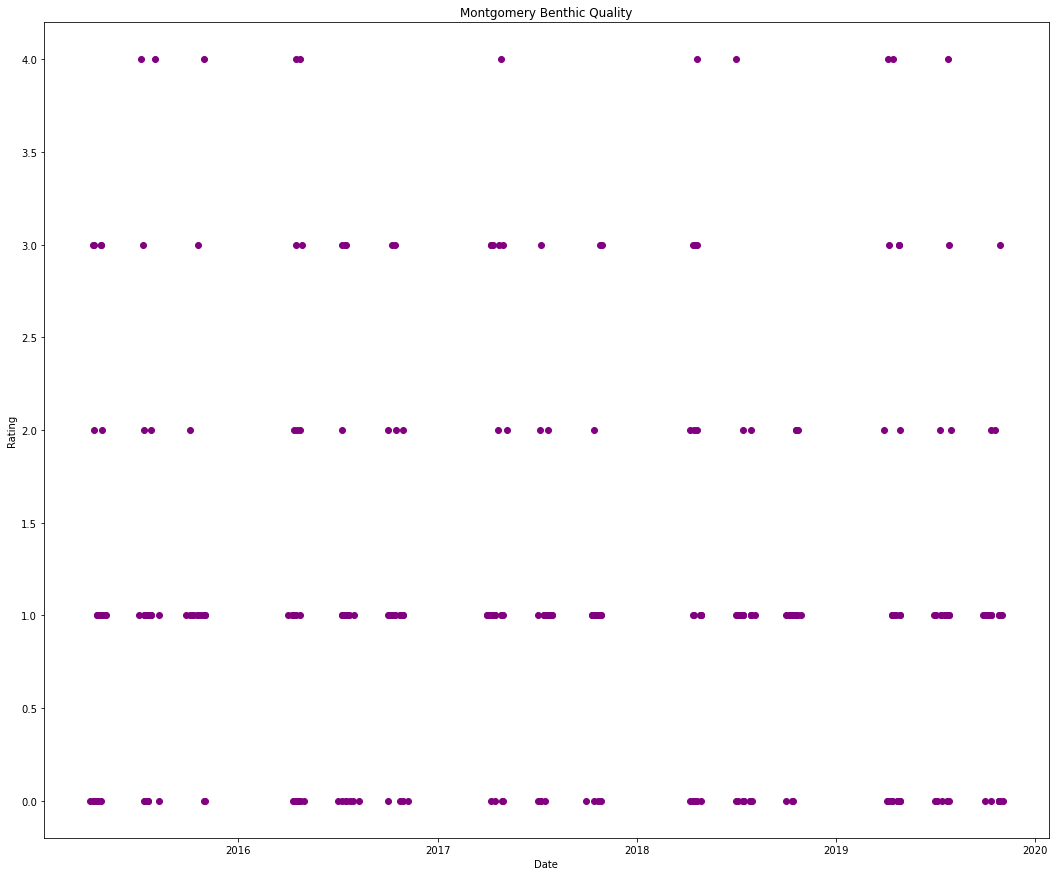

In [24]:
fig, ax = plt.subplots(figsize=(18, 15))

# Add x-axis and y-axis
ax.scatter(Montgomery.index.values,
        Montgomery['rating'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Rating",
       title="Montgomery Benthic Quality")

plt.show()

In [25]:
Montgomery.rating.mean()

1.1074918566775245

In [29]:
print(Montgomery.rating.mean()) 
print(Rappahannock.rating.mean()) 
print(Fairfax.rating.mean()) 
print(Frederick.rating.mean()) 
print(Loudoun.rating.mean()) 
print(Howard.rating.mean())
print(Augusta.rating.mean()) 
print(DC.rating.mean()) 
print(Rockbridge.rating.mean())
print(Fauquier.rating.mean()) 
print(Prince_William.rating.mean())
print(Madison.rating.mean())
print(Bedford.rating.mean())
print(Richmond.rating.mean())

1.1074918566775245
0.8461538461538461
0.33090909090909093
1.0
0.5238095238095238
nan
nan
0.029411764705882353
nan
0.8481012658227848
nan
nan
nan
nan


In [32]:
Howard

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,,


In [31]:
recent_df[recent_df['COUNTY'] == 'Richmond City']

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,,


In [34]:
recent_df[recent_df['COUNTY'] == 'Howard County']

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,,


In [40]:
stream_health.head()

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,,
1994-04-30,4494,1767_1,1767,1,lnp,"ANS.SITE 6, ROCK CREEK AT MUNCASTER MILL ROAD",55.593878,1,39.13803,-77.12872,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
1994-04-30,1594,121_1,121,1,blue,ANS.NW-NW 13,9.100817,0,39.06963,-77.97016,CMC,ANS,20700070201,Chapel Run-Shenandoah River,51043,VA,Clarke County
1994-04-30,5357,447_1,447,1,lnp,"ANS.SITE 14, DAYSPRING CREEK",69.519411,1,39.20321,-77.22988,CMC,ANS,20700080802,Great Seneca Creek,24031,MD,Montgomery County
1994-05-01,5416,542_1,542,1,lnp,"ANS.SITE 15, COUNTRYSIDE TRIBUTARY OF PAINT BR...",5.694700,0,39.08736,-76.96345,CMC,ANS,20700100202,Paint Branch,24031,MD,Montgomery County
1994-05-08,4743,2034_1,2034,1,lnp,ANS.UR-RC 4,83.519834,3,39.15474,-77.13165,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County


In [119]:
df_2019.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False) - df_2017.groupby(['COUNTY']).mean().sort_values(by=['rating'], ascending=False)

,Unnamed: 0,event_id,sample_num,chessie_bibi,rating,Latitude,Longitude,HUC12,FIPS
COUNTY,,,,,,,,,
Alleghany County,2.500000,2.500000,0.0,-1.665348,0.000000,0.000000,0.000000,0.000000e+00,0.0
Augusta County,2.857143,2.857143,0.0,2.179868,0.142857,0.000000,0.000000,0.000000e+00,0.0
Bedford County,2622.000000,8.000000,0.0,1.603460,0.000000,-0.029700,-0.009735,5.000000e-01,0.0
Charles County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chesterfield County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Culpeper County,1.500000,1.500000,0.0,15.762278,0.000000,0.000000,0.000000,0.000000e+00,0.0
District of Columbia,-97.291667,9.250000,0.0,-2.459885,0.000000,-0.003457,-0.001307,0.000000e+00,0.0
Fairfax County,-9.808841,29.624851,0.0,4.073958,0.135603,-0.013668,0.001926,1.109772e+03,0.0
Fauquier County,-38.956044,-21.945055,0.0,-1.499281,-0.010989,0.016632,-0.013429,-9.243893e+06,0.0
